#### Activity 3 - Logistic Regression Practice (Iris Data Set and Heart Attack)

Basic Classification Algorithm - Binary Logistic Regression

We would need to practice using a few datasets to understand how logistic regression works. 

##### Part 1 - Iris Data Set
Create a separate Jupyter Notebook. 

The Iris Data set is comprised of the following features:

- sepal length
- sepal width
- petal length
- petal width
- Iris Species
  
For this part, create a program that will be based on the logistic regression for each of the Iris Species. 

- Create a logistic regression that will determine if the species is SETOSA or not. 
- Create a logistic regression that will determine if the species is VERSICOLOR or not. 
- Create a logistic regression that will determine if the species is VIRGINICA or not.


The interface should look like the following:
![Iris Data Set UI](https://github.com/Pipaolo/cs-machine-learning/blob/main/images/iris-dataset-ui.png?raw=true)

##### Considerations:

1. Use the minimum and maximum values of the data for validation. 

2. For each logistic regression, show the confusion matrix and accuracy of the model. 

3. Display the probability of each species. 

***Warning notes:** Since we will be using this method, there will be times wherein an entry will produce no species or more than one species. *

##### Discussion of results and reflection

1. How accurate is each model? 

2. Is logistic regression a good use case for classifying the iris data set? Elucidate your answer. 

3. What are your recommendations for improving the classification of this data det? Explain. 

4. Create a graphical model of how the selection of logistic regression works. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv("datasets/iris.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Create the following features: sepal_length sepal_width petal_length petal_width, iris_species
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['iris_species']



In [12]:

# Encode the iris_species column using LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Create a test prediction
y_pred = model.predict(x_test)

array([0, 2, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1,
       2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1,
       2])

In [16]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred)

print("Classification Report: ")
print(report)
print("Confusion Matrix: ")
print(cm)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      0.92      0.92        13
           2       0.96      0.96      0.96        25

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix: 
[[ 7  0  0]
 [ 0 12  1]
 [ 0  1 24]]


<Axes: >

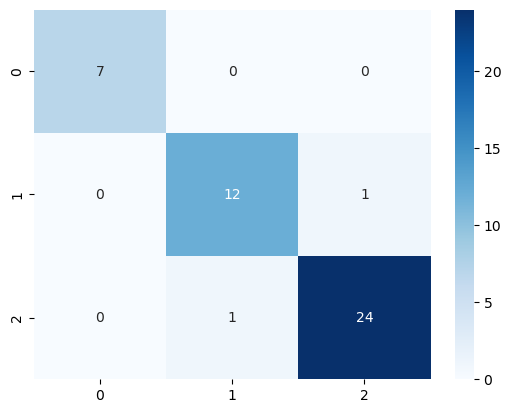

In [17]:
# Create a plot for the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')


In [18]:
sample_pred = model.predict([[5.1, 3.5, 1.4, 0.2]])
print("Sample Prediction: ")
print(sample_pred)

Sample Prediction: 
[0]


f:\school\cs-machine-learning\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
# UI 
import ipywidgets as widgets
from IPython.display import display, clear_output

# Title
title = widgets.HTML("<center><h1>Machine Learning Activity 3 Part 1</h1></center>")

def build_input(label: str) -> tuple[widgets.VBox, widgets.FloatText]:
    input = widgets.FloatText()

    return widgets.VBox([
        widgets.Label(value=label, layout=widgets.Layout(width='200px', font_weight='bold')),
        input,
    ]), input,

sepal_length_container, sepal_length_input = build_input('Sepal Length:')
sepal_width_container, sepal_width_input = build_input('Sepal Width:')
petal_length_container, petal_length_input = build_input('Petal Length:')
petal_width_container, petal_width_input = build_input('Petal Width:')

# Layout
form_layout = widgets.VBox([
    sepal_length_container,
    sepal_width_container,
    petal_length_container,
    petal_width_container,
])


def build_results() -> widgets.VBox:

    return widgets.VBox([])

results_layout = widgets.VBox([
    widgets.Label(value= "Iris Species"),
    widgets.HBox([widgets.Label(value='SETOSA'), widgets.Label(value='VERSICOLOR'), widgets.Label(value="VIRGINICA")]),
    widgets.HBox([widgets.Label(value='TRUE'), widgets.Label(value='FALSE'), widgets.Label(value='FALSE')]),
])

container =  widgets.GridBox(
    [form_layout, results_layout],
    layout=widgets.Layout(grid_template_columns="repeat(2, 400px)")
)

display(title, container)

HTML(value='<center><h1>Machine Learning Activity 3 Part 1</h1></center>')

GridBox(children=(VBox(children=(VBox(children=(Label(value='Sepal Length:', layout=Layout(width='200px')), Fl…